### Named Entity Recognition
- NLP task to identify important named entities in the text
    - people, places, orgs, dates, states, etc.
- can use alongside topic identification 
- used to find who, what, when, where

In [1]:
import nltk
nltk.download('averaged_perceptron_tagger')

sentence = '''In New York, I like to ride the metro to visit MOMA and some restaurants rated well by Ruth Reichl.'''

tokenized_sent = nltk.word_tokenize(sentence)

# tag the sentence for parts of speech
tagged_sent = nltk.pos_tag(tokenized_sent)

print (tagged_sent)



[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP'), (',', ','), ('I', 'PRP'), ('like', 'VBP'), ('to', 'TO'), ('ride', 'VB'), ('the', 'DT'), ('metro', 'NN'), ('to', 'TO'), ('visit', 'VB'), ('MOMA', 'NNP'), ('and', 'CC'), ('some', 'DT'), ('restaurants', 'NNS'), ('rated', 'VBN'), ('well', 'RB'), ('by', 'IN'), ('Ruth', 'NNP'), ('Reichl', 'NNP'), ('.', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/samanvitha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
# named entity chunk -> return the sentence as a tree
print (nltk.ne_chunk(tagged_sent))


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/samanvitha/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/samanvitha/nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  metro/NN
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize
article = '\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'
print (article)

﻿The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.


Uber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hir

In [4]:

# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


<generator object ParserI.parse_sents.<locals>.<genexpr> at 0x10b380450>
[]
[]


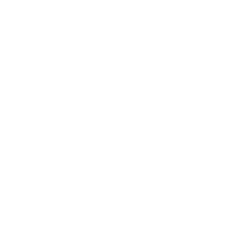

In [5]:
import matplotlib.pyplot as plt
from collections import defaultdict


# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

print (chunked_sentences)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

print (labels)

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

print (values)

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

### SpaCy
- similar to gensim
- focus on NLP pipelines to generate models and corporapipeline crea
- easy pipeline creation
- different entity types compared to nltk
- informal language corpora

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')

print (nlp.entity)

doc = nlp("""Berlin is the capital of Germany; and the residence of Chancellor Angela Merkel.""")

print (doc.ents)
print (doc.ents[0], doc.ents[0].label_)

(Berlin, Germany, Angela Merkel)
Berlin GPE


In [7]:
article = '\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'

print (article)

﻿The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.


Uber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hir

In [8]:
# Instantiate the English model: nlp
nlp = spacy.load('en_core_web_sm', tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG Uber
PERSON Uber
ORG unroll.me
ORG Apple
PERSON Travis Kalanick
PERSON Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
PERSON Uber
LOC Silicon Valley
ORG Yahoo
PERSON Marissa Mayer
MONEY $186m


### Multilingual NER with polyglot
- NLP library
- vectors for 130+ language support
- uses language detection model to detect which language

In [2]:
from polyglot.text import Text
text = """ El presidente de la Generalitat de Cataluña,
Carles Puigdemont, ha afirmado hoy a la alcaldesa
de Madrid, Manuela Carmena, que en su etapa de
alcalde de Girona (de julio de 2011 a enero de 2016)
hizo una gran promoción de Madrid."""

print (text)

 El presidente de la Generalitat de Cataluña,
Carles Puigdemont, ha afirmado hoy a la alcaldesa
de Madrid, Manuela Carmena, que en su etapa de
alcalde de Girona (de julio de 2011 a enero de 2016)
hizo una gran promoción de Madrid.


In [3]:
ptext = Text(text)
print (ptext)

 El presidente de la Generalitat de Cataluña,
Carles Puigdemont, ha afirmado hoy a la alcaldesa
de Madrid, Manuela Carmena, que en su etapa de
alcalde de Girona (de julio de 2011 a enero de 2016)
hizo una gran promoción de Madrid.


In [8]:
# from polyglot.downloader import downloader
# downloader.download("embeddings2.es")
# downloader.download("ner2.es")
ptext.entities

[I-ORG(['Generalitat', 'de']),
 I-LOC(['Generalitat', 'de', 'Cataluña']),
 I-PER(['Carles', 'Puigdemont']),
 I-LOC(['Madrid']),
 I-PER(['Manuela', 'Carmena']),
 I-LOC(['Girona']),
 I-LOC(['Madrid'])]

In [9]:
article = "\ufeffédition abonné\r\n\r\n\r\nDans une tribune au « Monde », l’universitaire Charles Cuvelliez estime que le fantasme d’un remplacement de l’homme par l’algorithme et le robot repose sur un malentendu.\r\n\r\n\r\nLe Monde | 10.05.2017 à 06h44 • Mis à jour le 10.05.2017 à 09h47 | Par Charles Cuvelliez (Professeur à l’Ecole polytechnique de l'université libre de Bruxelles)\r\n\r\n\r\nTRIBUNE. L’usage morbide, par certains, de Facebook Live a amené son fondateur à annoncer précipitamment le recrutement de 3 000 modérateurs supplémentaires. Il est vrai que l’intelligence artificielle (IA) est bien en peine de reconnaître des contenus violents, surtout diffusés en direct.\r\n\r\n\r\nLe quotidien affreux de ces modérateurs, contraints de visionner des horreurs à longueur de journée, mériterait pourtant qu’on les remplace vite par des machines !\r\n\r\n\r\nL’IA ne peut pas tout, mais là où elle peut beaucoup, on la maudit, accusée de détruire nos emplois, de remplacer la convivialité humaine. Ce débat repose sur un malentendu.\r\n\r\n\r\nIl vient d’une définition de l’IA qui n’a, dans la réalité, jamais pu être mise en pratique : en 1955, elle était vue comme la création de programmes informatiques qui, quoi qu’on leur confie, le feraient un jour mieux que les humains. On pensait que toute caractéristique de l’intelligence humaine pourrait un jour être si précisément décrite qu’il suffirait d’une machine pour la simuler. Ce n’est pas vrai.\r\n\r\n\r\nAngoisses infondées\r\n\r\n\r\nComme le dit un récent Livre blanc sur la question (Pourquoi il ne faut pas avoir peur de l’Intelligence arti\xadficielle, Julien Maldonato, Deloitte, mars 2017), rien ne pourra remplacer un humain dans sa globalité.\r\n\r\n\r\nL’IA, c’est de l’apprentissage automatique doté d’un processus d’ajustement de modèles statistiques à des masses de données, explique l’auteur. Il s’agit d’un apprentissage sur des paramètres pour lesquels une vision humaine n’explique pas pourquoi ils marchent si bien dans un contexte donné.\r\n\r\n\r\nC’est aussi ce que dit le rapport de l’Office parlementaire d’évaluation des choix scientifiques et technologiques (« Pour une intelligence artificielle maîtrisée, utile et démystifiée », 29 mars 2017), pour qui ce côté « boîte noire » explique des angoisses infondées. Ethiquement, se fonder sur l’IA pour des tâches critiques sans bien comprendre le comment..."
print (article)

﻿édition abonné


Dans une tribune au « Monde », l’universitaire Charles Cuvelliez estime que le fantasme d’un remplacement de l’homme par l’algorithme et le robot repose sur un malentendu.


Le Monde | 10.05.2017 à 06h44 • Mis à jour le 10.05.2017 à 09h47 | Par Charles Cuvelliez (Professeur à l’Ecole polytechnique de l'université libre de Bruxelles)


TRIBUNE. L’usage morbide, par certains, de Facebook Live a amené son fondateur à annoncer précipitamment le recrutement de 3 000 modérateurs supplémentaires. Il est vrai que l’intelligence artificielle (IA) est bien en peine de reconnaître des contenus violents, surtout diffusés en direct.


Le quotidien affreux de ces modérateurs, contraints de visionner des horreurs à longueur de journée, mériterait pourtant qu’on les remplace vite par des machines !


L’IA ne peut pas tout, mais là où elle peut beaucoup, on la maudit, accusée de détruire nos emplois, de remplacer la convivialité humaine. Ce débat repose sur un malentendu.


Il vient d

In [12]:
# downloader.download("embeddings2.fr")
# downloader.download("ner2.fr")

# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print (ent)
    
# Print the type of ent
print (type(ent))

[polyglot_data] Downloading package ner2.fr to
[polyglot_data]     /Users/samanvitha/polyglot_data...
['Charles', 'Cuvelliez']
['Charles', 'Cuvelliez']
['Bruxelles']
['l’IA']
['Julien', 'Maldonato']
['Deloitte']
['Ethiquement']
['l’IA']
['.']
<class 'polyglot.text.Chunk'>


In [13]:
# Your task is to use a list comprehension to create a list of tuples, in which the first element is the entity tag, and the second element is the full string of the entity text.

# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print (entities)


[('I-PER', 'Charles Cuvelliez'), ('I-PER', 'Charles Cuvelliez'), ('I-ORG', 'Bruxelles'), ('I-PER', 'l’IA'), ('I-PER', 'Julien Maldonato'), ('I-ORG', 'Deloitte'), ('I-PER', 'Ethiquement'), ('I-LOC', 'l’IA'), ('I-PER', '.')]
